<a href="https://colab.research.google.com/github/PaulToronto/Howard-University-Coursera-Linear-Algebra-For-Data-Science-Specialization/blob/main/3_1_1_Solving_Systems_of_Linear_Equations_Using_Row_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.1.1 Solving Systems of Linear Equations Using Row Reduction

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

## 3.1.1.1 Row Reduction (Infinitely Many Solutions)

Given two planes in 3-space, there are only 2 possibilities:

1. The planes are parallel and never intersect (no solution)
2. The planes intersect in a line (infinitely many solutions

### Example

Solve this system of linear equations.

$$
\begin{align}
x + y + z &= 10 \\
2x - y + 2z &= 8
\end{align}
$$

In [2]:
M = sym.Matrix([[1, 1, 1, 10],
                [2, -1, 2, 8]])
M

Matrix([
[1,  1, 1, 10],
[2, -1, 2,  8]])

$R_2 \longleftarrow R_2 - 2R_1$

In [3]:
M[1,:] = M.row(1) - 2 * M.row(0)
M

Matrix([
[1,  1, 1,  10],
[0, -3, 0, -12]])

$R_2 \longleftarrow -\frac{1}{3}R_2$

In [4]:
M[1, :] = -sym.Rational(1, 3) * M.row(1)
M

Matrix([
[1, 1, 1, 10],
[0, 1, 0,  4]])

$R_1 \longleftarrow R_1 - R_2$

In [5]:
M[0,:] = M.row(0) - M.row(1)
M

Matrix([
[1, 0, 1, 6],
[0, 1, 0, 4]])

The line of intersection
$$
\begin{align}
y &= 4 \\
z &= -x + 6
\end{align}
$$

For the parametric equations, let $x = t$

$$
\begin{align}
x &= t \\
y &= 4 \\
z &= -t + 6
\end{align}
$$

Solution set:

$$
\{(t, 4, -t + 6): t \in \mathbb{R}\}
$$

In [6]:
some_solutions = []
for t in np.linspace(-5, 5, 11):
    some_solutions.append(np.array([t, 4, -t + 6]))
some_solutions = np.array(some_solutions)
some_solutions

array([[-5.,  4., 11.],
       [-4.,  4., 10.],
       [-3.,  4.,  9.],
       [-2.,  4.,  8.],
       [-1.,  4.,  7.],
       [ 0.,  4.,  6.],
       [ 1.,  4.,  5.],
       [ 2.,  4.,  4.],
       [ 3.,  4.,  3.],
       [ 4.,  4.,  2.],
       [ 5.,  4.,  1.]])

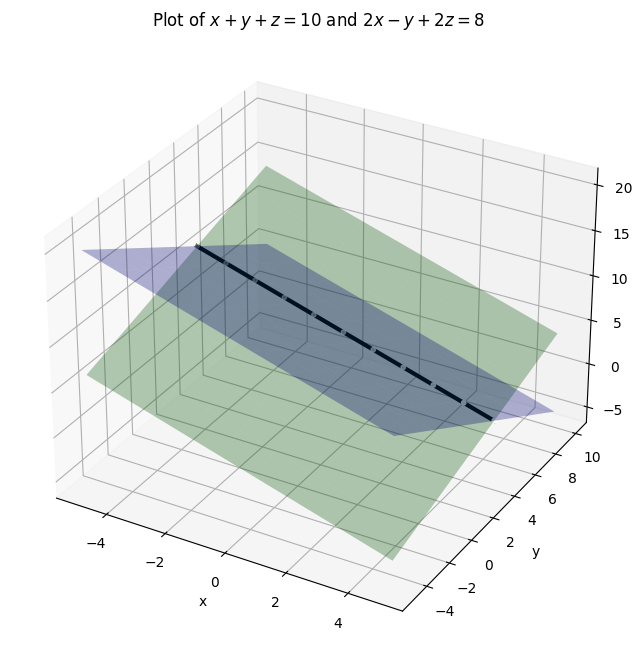

In [7]:
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 10, 10)

X, Y = np.meshgrid(x, y)
Z = -X - Y + 10
Z2 = -X + 0.5 * Y + 4

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection = '3d')

# plot planes
ax.plot_surface(X, Y, Z, alpha=0.3, color='blue')
ax.plot_surface(X, Y, Z2, alpha=0.3, color='green')

# plot line of intersection
# start of line when t = -5
# end of line when t = 5
start = -5
end = 5
line = [[t, 4, -t + 6] for t in [start, end]]
line = zip(line[0], line[1])
x, y, z = list(line)
ax.plot3D(x, y, z, linewidth=3, c='black')
ax.scatter3D(some_solutions[:,0], some_solutions[:,1], some_solutions[:, 2], c='white', s=10)

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.title('Plot of $x + y + z = 10$ and $2x - y + 2z = 8$')
plt.show()

## 3.1.1.2 Row Reduction (No Solutions)

### Example

Solve this system of linear equations.

$$
\begin{align}
x - 3y + z &= 4 \\
-x + 2y - 5z &= 3 \\
5x - 13y + 13z &= 8
\end{align}
$$

In [8]:
M = sym.Matrix([[1, -3, 1, 4],
                [-1, 2, -5, 3],
                [5, -13, 13, 8]])
M

Matrix([
[ 1,  -3,  1, 4],
[-1,   2, -5, 3],
[ 5, -13, 13, 8]])

$R_2 \longleftarrow R_1 + R_2$

In [9]:
M[1,:] = M.row(0) + M.row(1)
M

Matrix([
[1,  -3,  1, 4],
[0,  -1, -4, 7],
[5, -13, 13, 8]])

$R_3 \longleftarrow R_3 - 5R_1$

In [10]:
M[2,:] = M.row(2) - 5 * M.row(0)
M

Matrix([
[1, -3,  1,   4],
[0, -1, -4,   7],
[0,  2,  8, -12]])

In [11]:
M[2, :] = 2 * M.row(1) + M.row(2)
M

Matrix([
[1, -3,  1, 4],
[0, -1, -4, 7],
[0,  0,  0, 2]])

$0x + 0y + 0z = 2$ is not possible.

$\therefore$ this system has no solutions.

## 3.1.1.3 Finding Inverses of Higher Dimension Matrices

In [12]:
M = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 11]])
M

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8, 11]])

Let $N$ be the inverse of $M$

In [13]:
N = np.linalg.inv(M)
N

array([[-1.16666667, -0.33333333,  0.5       ],
       [ 0.33333333,  1.66666667, -1.        ],
       [ 0.5       , -1.        ,  0.5       ]])

In [14]:
np.matmul(M, N)

array([[ 1.00000000e+00,  0.00000000e+00,  2.77555756e-16],
       [-4.44089210e-16,  1.00000000e+00,  1.11022302e-16],
       [-1.11022302e-15,  0.00000000e+00,  1.00000000e+00]])

In [15]:
M @ N

array([[ 1.00000000e+00,  0.00000000e+00,  2.77555756e-16],
       [-4.44089210e-16,  1.00000000e+00,  1.11022302e-16],
       [-1.11022302e-15,  0.00000000e+00,  1.00000000e+00]])

In [16]:
R = np.random.randint(-8, 8, size=(10, 10))
R

array([[-5,  0,  1,  6,  7, -3,  4, -3, -8, -8],
       [-6, -4,  1, -2,  6, -2,  2,  4, -3,  1],
       [ 3,  3, -5,  2, -8,  5, -2,  7,  4, -8],
       [-2,  1,  2, -2, -7,  6,  3,  2,  7,  7],
       [ 0, -7,  4, -2,  2,  3,  2, -4, -7, -2],
       [-4,  5,  6,  2,  6, -6,  3, -6, -5,  4],
       [-8,  1, -7, -3, -7,  4, -1, -4, -8,  7],
       [ 0, -7, -8,  6, -8,  2,  2, -8,  6,  5],
       [-7, -5,  7,  0,  4,  2,  0,  6,  3,  0],
       [ 6,  6, -6, -3, -8, -3, -7, -4,  3,  6]])

In [17]:
if np.linalg.det(R) != 0:
    display(np.linalg.inv(R))
else:
    print('R is not invertible')

array([[-0.32274974, -0.03708557,  0.11581352, -0.19669493,  0.00702926,
         0.18479645,  0.01841127,  0.04579258, -0.09055602, -0.22075146],
       [ 0.0833281 , -0.10253658, -0.08864746,  0.05868319, -0.09101952,
        -0.07519334,  0.02528934, -0.06714243, -0.02280725, -0.01222993],
       [-0.07795126,  0.02597671,  0.12466571, -0.01872422,  0.10743076,
         0.16066657, -0.03161374,  0.01973156,  0.06131819,  0.02894034],
       [-0.48981772, -0.11120961,  0.2417013 , -0.37529772, -0.05795707,
         0.37818813,  0.09999655,  0.1320645 ,  0.00624542, -0.37260045],
       [ 0.02141397, -0.20845561, -0.25230249, -0.04497467, -0.1838598 ,
        -0.19940841,  0.05791138, -0.06771245, -0.02138357, -0.16012221],
       [-0.07498124, -0.30012   , -0.17361383, -0.07128733, -0.1440606 ,
        -0.13861662,  0.11617158, -0.0560371 , -0.00483519, -0.24271659],
       [ 0.09007394,  0.16067173,  0.0318335 ,  0.15721317,  0.05322637,
         0.00590187, -0.07061079,  0.0070687 

In [18]:
R = sym.Matrix(R)

In [19]:
if R.det() != 0:
    S = R.inv()
    display(S)
else:
    print('R is not invertible')

Matrix([
[ -168306592/521477077,  -19339273/521477077,    60394098/521477077,  -9324718/47407007,   333236/47407007,    96367114/521477077,   9601056/521477077,  2170889/47407007, -47222891/521477077, -115116824/521477077],
[  86907385/1042954154,  -53470474/521477077,  -92455239/1042954154,   5563989/94814014, -4314963/47407007,  -78423209/1042954154,  13187810/521477077, -6366043/94814014, -11893456/521477077,   -6377629/521477077],
[    -3695436/47407007,     1231478/47407007,      5910028/47407007,   -887659/47407007,  5092971/47407007,      7616721/47407007,   -1498713/47407007,   935414/47407007,    2906912/47407007,     1371975/47407007],
[-510857421/1042954154,  -57993261/521477077,  252083375/1042954154, -35583483/94814014, -2747571/47407007,  394432877/1042954154,  52145911/521477077, 12521565/94814014,   3256842/521477077, -194302593/521477077],
[  22333789/1042954154, -108704824/521477077, -263139931/1042954154,  -4264229/94814014, -8716243/47407007, -207973827/1042954154, 

In [20]:
R * S

Matrix([
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

## 3.1.1.4 Practice Quiz

In [21]:
M = sym.Matrix([[1, -3, 1, 4],
                [-1, 2, -5, 3],
                [5, -13, 13, 8]])
M

Matrix([
[ 1,  -3,  1, 4],
[-1,   2, -5, 3],
[ 5, -13, 13, 8]])

In [22]:
M.rref()

(Matrix([
 [1, 0, 13, 0],
 [0, 1,  4, 0],
 [0, 0,  0, 1]]),
 (0, 1, 3))

In [23]:
M.rref(pivots=False)

Matrix([
[1, 0, 13, 0],
[0, 1,  4, 0],
[0, 0,  0, 1]])

In [24]:
M = sym.Matrix([[0, 0, 0, 0],
                [-1, 2, -5, 3],
                [5, -13, 13, 8]])
M

Matrix([
[ 0,   0,  0, 0],
[-1,   2, -5, 3],
[ 5, -13, 13, 8]])

In [25]:
M.rref(pivots=0)

Matrix([
[1, 0, 13, -55/3],
[0, 1,  4, -23/3],
[0, 0,  0,     0]])

In [26]:
M = sym.Matrix([[1, 2, 3],
                [2, 4, 6],
                [7, 8, 9]])
M

Matrix([
[1, 2, 3],
[2, 4, 6],
[7, 8, 9]])

In [27]:
M.det()

0

In [28]:
M = sym.Matrix([[1, 3, 1, 1],
                [-4, -9, 2, -1],
                [0, -3, -6, -3]])
M

Matrix([
[ 1,  3,  1,  1],
[-4, -9,  2, -1],
[ 0, -3, -6, -3]])

In [29]:
M.rref(pivots=False)

Matrix([
[1, 0, -5, -2],
[0, 1,  2,  1],
[0, 0,  0,  0]])

In [30]:
M = sym.Matrix([[1, 2, -3, -1],
                [1, -3, 1, 1],
                [2, -1, -2, 2]])
M

Matrix([
[1,  2, -3, -1],
[1, -3,  1,  1],
[2, -1, -2,  2]])

In [31]:
M.rref(pivots=False)

Matrix([
[1, 0, -7/5, 0],
[0, 1, -4/5, 0],
[0, 0,    0, 1]])